# ANOMALY DETECTION - UNSUPERVISED LEARNING

**Scope**:

Compute the Anomaly Detection algorithm without use pre-compiled libraries such as ScikitLearn

## 1. Importing Libraries

In [1]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2. Defining Functions

In [2]:
# Computing Mean and Variance
def compute_mean_variance(X):
    """
    This algorithm computes and returns the mean and variance values of a set of examples
    
    args:
        X (ndarray): (m,n) array containing m examples with n features
    outputs:
        mean (ndarray): (n, ) array containing the means of each feature
        variance (ndarray): (n, ) array containing the varience of each feature
    """
    m, n = X.shape
    variance = np.zeros(n)
    
    mean = np.mean(X, axis = 0)
    for i in range(m):
        temp = (X[i] - mean)**2
        variance = variance+temp
    variance = variance/m
    return mean, variance
    

In [3]:
# Calculate Normal Probability
def compute_gaussian(X, mean, var):
    """
    Estimate the Gaussian Probability p(x) of all features in the dataset

    args: 
        X (nparray): (m,n) array containing m examples with n features
    outputs: 
        p_norm (ndarray): (n, ) array with all the estimated probabilities of each feature
    """
    m, n = X.shape
    p_norm = np.zeros(m)
    for i in range(m):
        for j in range(n):
            p_temp = 1/(np.sqrt(2*np.pi*var[j]))*np.exp((-(X[i,j] - mean[j])**2/(2*var[j])))
            if p_norm[i] == 0:
                p_norm[i] = p_temp
            else:
                p_norm[i] = p_norm[i]*p_temp
    return p_norm

In [4]:
# Calculate anomaly given a threshold
def compute_anomaly(X, threshold):
    """
    Compute whether an example is an anomaly or not
    args:
        X (nparray): (m, n) array of examples
    outputs:
        anomalous (ndarray): (m, ) array of anomalous (1) or not anomalous (0) 
    """
    m, n = X.shape
    mean, var = compute_mean_variance(X)
    p_norm = compute_gaussian(X, mean, var)
    anomalous = np.array(p_norm < threshold)
    return anomalous

##  3. Create and Visualize Data

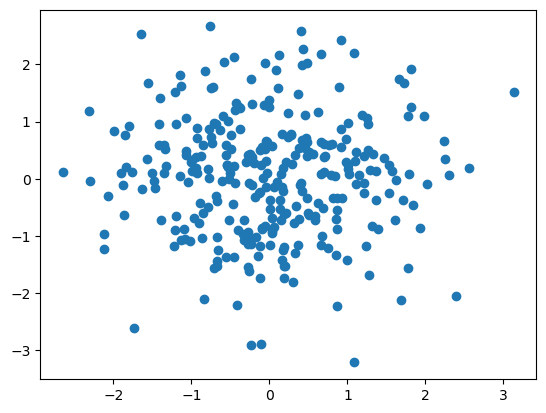

In [5]:
# Create a random normally distributed array with 2 features
np.random.seed(314)
X = np.random.normal(size = (300,2))

# Visualize the distribution
plt.scatter(X[:,0], X[:,1]);

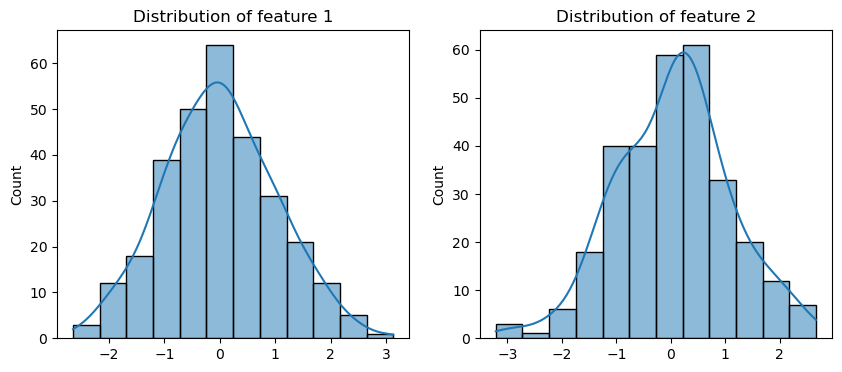

In [6]:
# Define plot features function
def plt_features_hist(X):
    n = X.shape[1]
    cols = 2
    if n % cols == 0:
        rows = n//cols
    else:
        rows = n//cols+1
    plt.figure(figsize = (10,4))
    for i in range(n):
        ax = plt.subplot(rows, n, i+1)
        ax.set_title(f"Distribution of feature {i+1}")
        sns.histplot(X[:,i], bins = 12, ax =ax, kde = True)

# Plot X
plt_features_hist(X)

## 4. Compute Anomaly Detection

In [7]:
threshold = 0.012
anomalies = compute_anomaly(X, threshold)

## 5. Show Results 

In [8]:
# Create a function that plots results
def plot_results(X, p_anomalies):
    """
    Plot the results to show what examples are anomalies and which ones are not
    args:
        X (ndarray): (m, n) array of examples
        p_anomalies (ndarray): (m, ) array of computed anomaly probabilities based on threshold
    outputs:
        scatter plot
    """
    m = p_anomalies.shape[0]
    X = pd.DataFrame(np.concatenate((X, p_anomalies.reshape(m,1)), axis = 1), columns = ['Feature 1', 'Feature 2', 'Label'])
    
    fig, ax = plt.subplots(figsize = (6,4))
    fig.tight_layout()
    ax.set_title("Anomaly Detection")
    sns.scatterplot(X, x = 'Feature 1', y='Feature 2', hue = 'Label')
    ax.legend(title = 'Good (0) vs Anomalous (1)')
    #ax.scatter(X[X[:,2] == 0, 0], X[X[:,2] == 0, 1], label = 'Good') # Variation if not using seaborn
    #ax.scatter(X[X[:,2] == 1, 0], X[X[:,2] == 1, 1], label = 'Anomalous') # Variation if not using seaborn
    #ax.legend() # Variation if not using seaborn
    return None

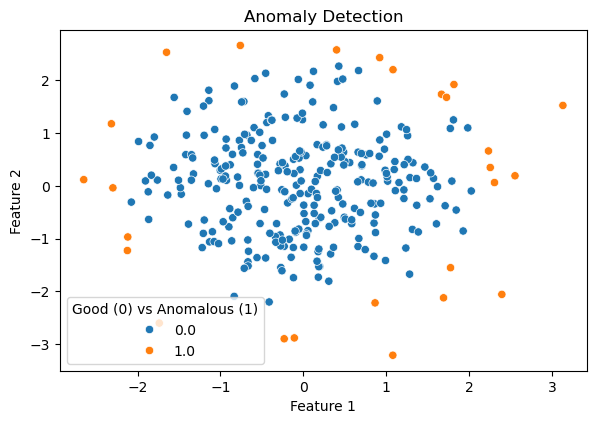

In [9]:
plot_results(X, anomalies)

## 6. Algorithm Variation

The following algorithm can be used if we have validation labels separating *Normal* from *Anomalous* cases.

> Anomaly Detection is useful to be done on labeled data if **anomalies are few** otherwise we could simply use `Logistic Regression`

In [10]:
# Creating validation labels
y_val = anomalies.copy()

In [11]:
# Automatically select a threshold based on labels
def define_threshold(y_val, p_val):
    """
    Function that computes F1 scores for various threshold values to compute which one is better
    
    args:
        y_val (ndarray): (m, ) validation array
        p_val (ndarray): (m, ) array of computed gaussian probabilities
    outputs:
        best_thresh (float): best threshold value
        best_f1_score (float): best F1 score related to the best_thresh value
    """
    best_thresh = 0
    best_f1_score = 0
    f1 = 0

    step_size = (max(p_val) - min(p_val))/1000

    for thresh in np.arange(min(p_val), max(p_val), step_size):
        predictions = (p_val < thresh)

        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            f1 = 2*precision*recall/(precision+recall)
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_thresh = thresh

    return best_thresh, best_f1_score

In [12]:
# Compute probability
mean, var = compute_mean_variance(X)
p_val = compute_gaussian(X, mean, var)

# Define best threshold and f1 score
best_thresh, best_f1 = define_threshold(y_val, p_val)

print(f'Best threshold (epsilon) for data X is: \t {best_thresh:.5}')
print(f'Best F1 score for data X is:  \t\t\t {best_f1}')

Best threshold (epsilon) for data X is: 	 0.012046
Best F1 score for data X is:  			 1.0
